1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


dataset:
 [[  0.88780847  -0.99035625   1.89490308 ...   0.4169122   -0.63387662
    1.86384128]
 [  6.71847532   0.25010289   3.92860979 ...  -0.92995753  -1.45504086
    6.4346804 ]
 [  8.49409225  -1.73060962   7.71841596 ...  -0.09613313  -2.7227941
   10.16236296]
 [-10.95137453  -1.64163345  -0.91220992 ...  -0.94809698  -0.79921491
   -1.09572878]] 

Cov matrix:
 [[ 0.94885178  0.97691639  2.87461994 -0.09378152]
 [ 0.97691639 10.3865242  12.34035697  0.0747743 ]
 [ 2.87461994 12.34035697 18.08959686 -0.11278874]
 [-0.09378152  0.0747743  -0.11278874 25.39590746]] 

True : SVD and LA lead to the same original matrix C

Principal Component 1: 0.00 %
Principal Component 2: 3.54 %
Principal Component 3: 50.13 %
Principal Component 4: 46.32 %

Yes, it makes sense that the first principal component explains the most variability because the 2nd and 3rd components are linear combinations of the first component.

1 principal components explain at least 99% of the variability.


C:\Users\gabri\AppData\Local\Temp\ipykernel_1848\1030846256.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  print(f"Principal Component {i+1}: {float(var):.2f} %")


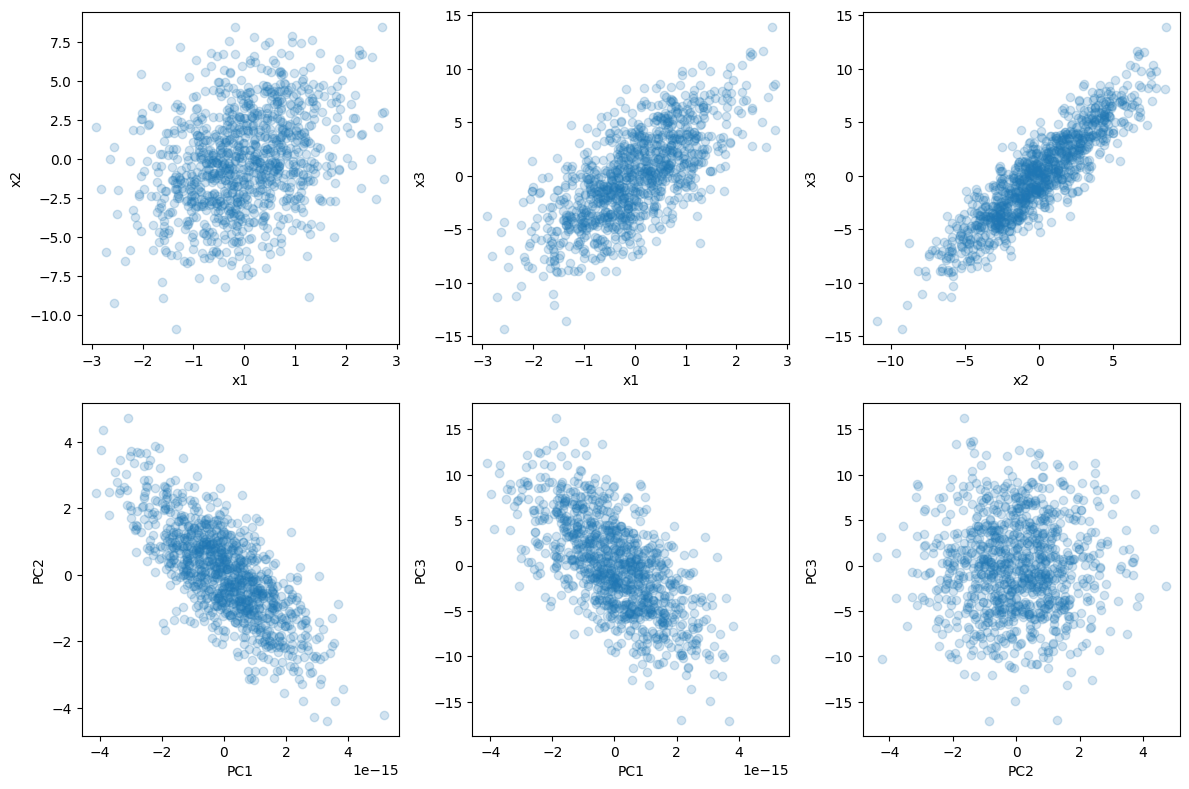

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la

x1 = np.random.normal(0, 1, 1000)
x2 = x1 + np.random.normal(0, 3, 1000)
x3 = 2*x1 + x2

X = np.stack((x1, x2, x3), axis=0)
print('dataset:\n',X,'\n')

# Compute the covariance matrix
C = np.cov(X)
print('Cov matrix:\n',C, '\n')

# Compute the eigenvalues and eigenvectors of C
evals, evecs = la.eig(C)
# print("Eigenvalues (LA):", evals)
# print("Eigenvectors (LA):\n", evecs)

U, S, Vt = np.linalg.svd(C)
evecs_svd = U
evals_svd = S**2 / (len(X) - 1)

# print("Eigenvalues (SVD):", evals_svd)
# print("Eigenvectors (SVD):\n", evecs_svd)

# Let's verify the definition of SVD by hand
D = np.zeros((3, 3))
for i in range(min(3, 3)):
    D[i, i] = S[i]
SVD = np.dot(U, np.dot(D, Vt))
# print (SVD)

LA = np.dot(evecs, np.dot(np.diag(evals), evecs.T))

if np.allclose(SVD, C) == True and np.allclose(LA, C) == True: print(bool(True), ": SVD and LA lead to the same original matrix C\n")

# Calculate the percentage of variability explained by each principal component
explained_var = evals / np.sum(evals)
percent_var = explained_var * 100

# Print the percentage of variability explained by each principal component
for i, var in enumerate(percent_var):
    print(f"Principal Component {i+1}: {float(var):.2f} %")
print('\nYes, it makes sense that the first principal component explains the most variability because the 2nd and 3rd components are linear combinations of the first component.\n')

# Calculate the cumulative explained variance
cumulative_var = np.cumsum(explained_var)

# Find the number of principal components that explain at least 99% of the variability
num_components = np.argmax(cumulative_var >= 99) + 1

print(f"{num_components} principal components explain at least 99% of the variability.")

# Reduce the dimensionality of the system
reduced_X = np.dot(evecs[:, :num_components].T, X)

redefined_X = np.dot(evecs.T, X)

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plotting the original coordinates
axs[0, 0].scatter(X[0], X[1], alpha=0.2)
axs[0, 0].set_xlabel('x1')
axs[0, 0].set_ylabel('x2')

axs[0, 1].scatter(X[0], X[2], alpha=0.2)
axs[0, 1].set_xlabel('x1')
axs[0, 1].set_ylabel('x3')

axs[0, 2].scatter(X[1], X[2], alpha=0.2)
axs[0, 2].set_xlabel('x2')
axs[0, 2].set_ylabel('x3')

# Plotting the new coordinates
axs[1, 0].scatter(redefined_X[0], redefined_X[1], alpha=0.2)
axs[1, 0].set_xlabel('PC1')
axs[1, 0].set_ylabel('PC2')

axs[1, 1].scatter(redefined_X[0], redefined_X[2], alpha=0.2)
axs[1, 1].set_xlabel('PC1')
axs[1, 1].set_ylabel('PC3')

axs[1, 2].scatter(redefined_X[1], redefined_X[2], alpha=0.2)
axs[1, 2].set_xlabel('PC2')
axs[1, 2].set_ylabel('PC3')

plt.tight_layout()
plt.show()



2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

Cov matrix (updated dataset):
 [[ 1.18585193  0.94177691  3.00078589]
 [ 0.94177691  9.87940437 11.70005043]
 [ 3.00078589 11.70005043 18.17396307]] 

True : SVD and LA lead to the same original matrix C_

Principal Component 1 (updated dataset): 91.63 %
Principal Component 2 (updated dataset): 0.66 %
Principal Component 3 (updated dataset): 7.72 %

Yes, it still makes sense that the first principal component explains the most variability because the 2nd and 3rd components are linear combinations of the first component.

1 principal components (updated dataset) explain at least 99% of the variability.



C:\Users\gabri\AppData\Local\Temp\ipykernel_1848\3079575042.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
  print(f"Principal Component {i+1} (updated dataset): {float(var):.2f} %")


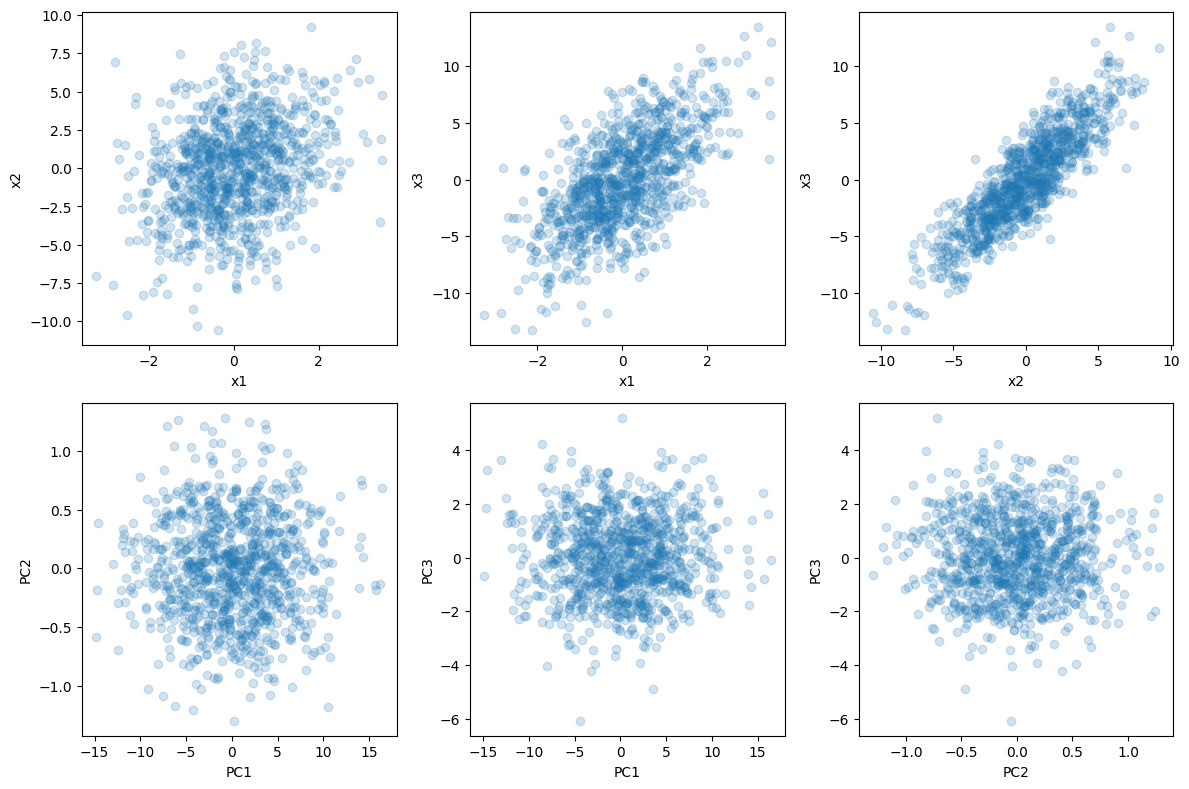

In [17]:
N = 1000
noise1 = np.random.multivariate_normal(np.zeros(10), 1./50 * np.diag(np.ones(10)), N)
no1 = noise1.sum(axis=1)

noise2 = np.random.multivariate_normal(np.zeros(10), 1./50 * np.diag(np.ones(10)), N)
no2 = noise2.sum(axis=1)

noise3 = np.random.multivariate_normal(np.zeros(10), 1./50 * np.diag(np.ones(10)), N)
no3 = noise3.sum(axis=1)

x1_ = x1 + no1
x2_ = x2 + no2
x3_ = x3 + no3

X_ = np.stack((x1_, x2_, x3_), axis=0)

# Compute the covariance matrix
C_ = np.cov(X_)
print('Cov matrix (updated dataset):\n', C_, '\n')

# Compute the eigenvalues and eigenvectors of C_
evals_, evecs_ = la.eig(C_)
# print("Eigenvalues (LA, updated dataset):", evals_)
# print("Eigenvectors (LA, updated dataset):\n", evecs_)

U_, S_, Vt_ = np.linalg.svd(C_)
evecs_svd_ = U_
evals_svd_ = S_**2 / (len(X_) - 1)

# print("Eigenvalues (SVD, updated dataset):", evals_svd_)
# print("Eigenvectors (SVD, updated dataset):\n", evecs_svd_)

# Let's verify the definition of SVD by hand
D_ = np.zeros((3, 3))
for i in range(min(3, 3)):
    D_[i, i] = S_[i]
SVD_ = np.dot(U_, np.dot(D_, Vt_))
# print (SVD_)

LA_ = np.dot(evecs_, np.dot(np.diag(evals_), evecs_.T))

if np.allclose(SVD_, C_) == True and np.allclose(LA_, C_) == True: print(bool(True), ": SVD and LA lead to the same original matrix C_\n")

# Calculate the percentage of variability explained by each principal component
explained_var_ = evals_ / np.sum(evals_)
percent_var_ = explained_var_ * 100

# Print the percentage of variability explained by each principal component
for i, var in enumerate(percent_var_):
    print(f"Principal Component {i+1} (updated dataset): {float(var):.2f} %")
print('\nYes, it still makes sense that the first principal component explains the most variability because the 2nd and 3rd components are linear combinations of the first component.\n')

# Calculate the cumulative explained variance
cumulative_var_ = np.cumsum(explained_var_)

# Find the number of principal components that explain at least 99% of the variability
num_components_ = np.argmax(cumulative_var_ >= 99) + 1

print(f"{num_components_} principal components (updated dataset) explain at least 99% of the variability.\n")

# Reduce the dimensionality of the system
reduced_X_ = np.dot(evecs_[:, :num_components_].T, X_)

redefined_X_ = np.dot(evecs_.T, X_).T

fig_, axs_ = plt.subplots(2, 3, figsize=(12, 8))

# Plotting the original coordinates (updated dataset)
axs_[0, 0].scatter(X_.T[:, 0], X_.T[:, 1], alpha=0.2)
axs_[0, 0].set_xlabel('x1')
axs_[0, 0].set_ylabel('x2')

axs_[0, 1].scatter(X_.T[:, 0], X_.T[:, 2], alpha=0.2)
axs_[0, 1].set_xlabel('x1')
axs_[0, 1].set_ylabel('x3')

axs_[0, 2].scatter(X_.T[:, 1], X_.T[:, 2], alpha=0.2)
axs_[0, 2].set_xlabel('x2')
axs_[0, 2].set_ylabel('x3')

# Plotting the new coordinates (updated dataset)
axs_[1, 0].scatter(redefined_X_[:, 0], redefined_X_[:, 1], alpha=0.2)
axs_[1, 0].set_xlabel('PC1')
axs_[1, 0].set_ylabel('PC2')

axs_[1, 1].scatter(redefined_X_[:, 0], redefined_X_[:, 2], alpha=0.2)
axs_[1, 1].set_xlabel('PC1')
axs_[1, 1].set_ylabel('PC3')

axs_[1, 2].scatter(redefined_X_[:, 1], redefined_X_[:, 2], alpha=0.2)
axs_[1, 2].set_xlabel('PC2')
axs_[1, 2].set_ylabel('PC3')

plt.tight_layout()
plt.show()


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [3]:
# get the dataset and its description on the proper data directory
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 